# 1. Crecimiento de la bacteria _V. natriegens_ en medio de cultivo con pH de 7.85

En algún experimento se recopilarón los siguientes datos del crecimiento de la población de bacterias.
Donde "Índice de Tiempo" se refiere a intervalos de 16 minutos.

| Tiempo (minutos) | Índice de Tiempo | Densidad de Población |
|------------------|------------------|-----------------------|
| 0                | 0                | 0.028                 |
| 16               | 1                | 0.047                 |
| 32               | 2                | 0.082                 |
| 48               | 3                | 0.141                 |
| 64               | 4                | 0.240                 |
| 80               | 5                | 0.381                 |

### $\mathrm{i}$) Repitase el análisis de datos visto en clases para esta tabla.

#### Notación
$t$ para denotar el intervalo de tiempo de 16 minutos en que se mide la densidad de población $B_t$; dónde $B_t$ se mide al inicio del intervalo. Así $B_t$ ha sido medido a los $t\times 16$ minutos.

#### Gráficas

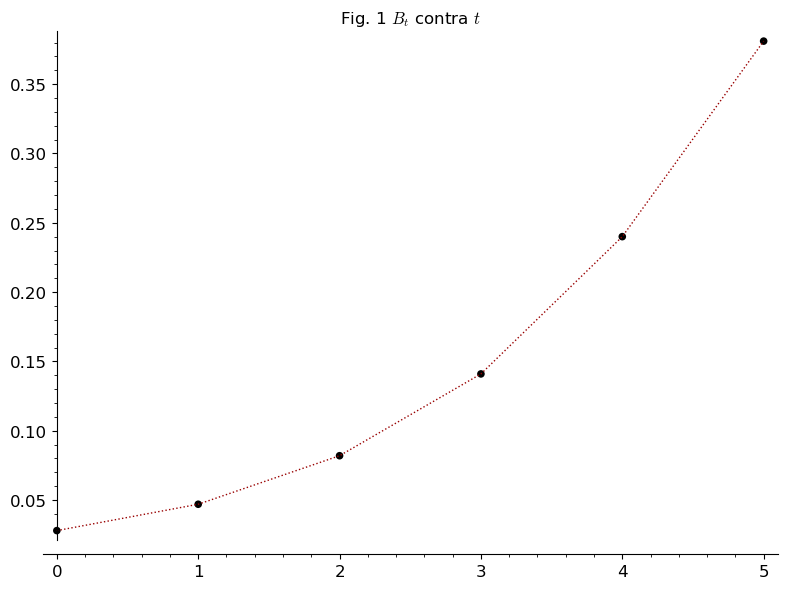

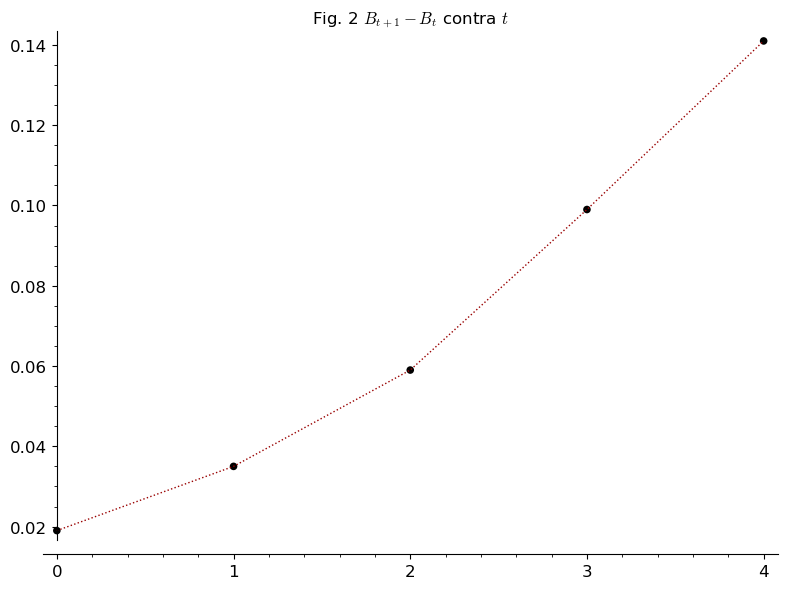

In [276]:
def dotted(tabla, label=None):
    return plot(points(tabla, rgbcolor=(0,0,0), pointsize=30, legend_label=label)+
                list_plot(tabla, plotjoined=True, linestyle=":", rgbcolor=(0.6,0,0)))

def cshow(ctabla, ctitle=None, cticks=None, #ticks es un arreglo con el tamaño de escalón de cada eje
          cfigsize=8, cfontsize=12):
    return show(dotted(tabla=ctabla), title=ctitle, ticks=cticks,
                figsize=cfigsize, fontsize=cfontsize) 
    
Tabla1 = [(0, 0.028),
        (1, 0.047),
        (2, 0.082),
        (3, 0.141),
        (4, 0.240),
        (5, 0.381)]

Tabla2 = list()
for t in range(5):
    Tabla2.append( (t, Tabla1[t+1][1]-Tabla1[t][1]) )
    
cshow(Tabla1, ctitle="Fig. 1 $B_t$ contra $t$", cticks = [1,None])
cshow(Tabla2, ctitle="Fig. 2 $B_{t+1}-B_t$ contra $t$", cticks = [1,None])

Se observa de la figura 1 que cada vez está más separado un valor de otro, con lo que el crecimiento se hace cada vez mayor. Pero de la figura 2 se observa que el crecimiento $B_{t+1}-B_t$ tampoco es lineal sobre el tiempo. Cada vez su taza de crecimiento, representada por la pendiente de la recta aumenta en $t$ (a excepción de con el último punto). 

Como $B_t$ también aumenta con el tiempo, se piensa que podría relacionarse mejor (linealmente) con $B_{t+1}-B_{t}$ que $t$. Dado que ambas son cantidades que aumentan con el tiempo.

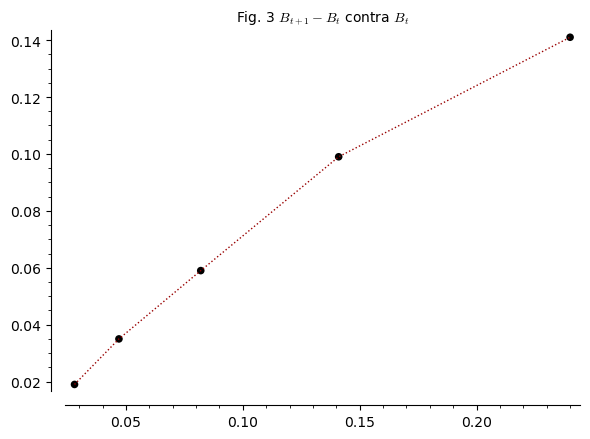

In [131]:
Tabla3 = list()
for t in range(5):
    Tabla3.append( (Tabla1[t][1], Tabla2[t][1]) )
    
dotted(Tabla3, "Fig. 3 $B_{t+1}-B_t$ contra $B_t$")

Se puede observar fácilmente los primeros cuatro puntos de la figura 3 pueden estar más cerca todos de una recta que si se considera acercar el último punto a la recta. Por lo que al menos cuatro de los cinco puntos se ajustan bien a un modelo lineal. Puede ser tanto que el último dato sea error de medición, como que después del tiempo $t=3$ (48 minutos en adelante) otro modelo describa mejor el fenómeno. En el primer caso, solo perjudica tomar en cuenta el último punto. Pues se aumenta la distancia de los otros puntos a la recta por acercarla al dato erroneo. Pero si el dato está bien medido, tomar el punto en cuenta puede resultar en un modelo más cercano a lo que se observaría en otra medición.

El criterio de un experto en el crecimiento de bacterias podría determinar cuál de los dos casos tenemos.
Por lo que consideramos ambos casos; un modelo sin tomar en cuenta el último punto, y otro tomando en cuenta todos los puntos. 

Otra idea para escoger una buena pendiente, es que se podrían considerar las pendientes del conjunto de rectas que unen pares de puntos de la figura 3 no necesariamente consecutivos. Y de aquí tomar el promedio ponderado por la distancia al promedio. Esto es que en vez de tener $n-1$ pendientes de $n$ puntos, consideraríamos $\sum^{n-1}_{j=1} j = \frac{n(n-1)}{2} = \frac{1}{2}n^2 -\frac{1}{2}n$ pendientes.

Para $t=0,1,2,3$: Sea $\Delta B_t = B_{t+1}-B_t$. Entonces la pendiente $m_t$ de la recta que conecta
$(B_t,\Delta B_t)$ con $(B_{t+1}, \Delta B_{t+1})$ es 
$$\frac{\Delta B_{t+1} - \Delta B_t}{B_{t+1} - B_t} = \frac{\Delta B_{t+1}-\Delta B_t}{\Delta B_t}.$$
O lo que es lo mismo $$m_t = \frac{\Delta B_{t+1}}{\Delta B_t}-1.$$

| $t$ | $B_t$ | $\Delta B_t$ | $m_t$  |
|-----|-------|---------------|--------|
| 0   | 0.028 | 0.019         | 0.842  |
| 1   | 0.047 | 0.035         | 0.686  |
| 2   | 0.082 | 0.059         | 0.678  |
| 3   | 0.141 | 0.099         | 0.424  |
| 4   | 0.240 | 0.141         |        |
| 5   | 0.381 |               |        |

##### Figura 4. 

In [354]:
lista_m = list()
for t in range(len(Tabla3)-1):
    lista_m.append(Tabla3[t+1][1]/Tabla3[t][1]-1) # elementos m_0,m_1,m_2,m_3

#promedio sin ultimo elemento    
k1 = (sum(lista_m)-lista_m[len(lista_m)-1])/(len(lista_m)-1); print("k_1 = ",k1) 

#promedio ponderado "a ojo"
k2  = 3*lista_m[0]                 
k2 += 4*lista_m[1]
k2 += 4*lista_m[2]
k2 += 1*lista_m[3]
k2 = k2/12
print("k_2 = ", k2)

#promedio ponderado por distancia al promedio
k3 = 0
s = 0
for j in range(len(lista_m)):
    s += abs(lista_m[j]-mean(lista_m))
    k3+= abs(lista_m[j]-mean(lista_m))*lista_m[j]
k3 = k3/s
print("k_3 = ", k3)

k_1 =  0.735261883522365
k_2 =  0.700439980279409
0.184598244455515
0.212805511467420
0.233264594459956
0.466529188919911
k_3 =  0.616520011592272


De la tabla de la tabla de la figura 4 se tiene que el promedio de las pendientes tomando en cuenta los tres primeros puntos es $k_1=0.735$. Consideremos también $k_2=0.700$ el promedio dandole un peso distinto a cada punto dependiendo (a ojo) qué tan bien se ajusten en una recta. 

#### Ecuación Dinámica
Por ahora usaremos $\hat B_t$ para referirnos a la aproximación del valor $B_t$ dado por un modelo lineal. $k$ se refiere a cualquier pendiente de la recta de este modelo (recta que aproxima los datos de la figura 3). De manera que la ecuación de la recta será descrita por una ecuación en terminos de $y = \Delta \hat B_t$ y $x = \hat B_t$. Si esta pasa por $(a,b)$ tenemos para $t\geq 0$
$$\Delta \hat B_t - b = k (\hat B_t - a).$$
Y en terminos de las aproximaciones de densidades,
$$\hat B_{t+1} = (1+k)\hat B_t +b-ka.$$

De manera que lo único que impediría que el modelo lineal de la figura 3 sea una recta que pase por el origen es que $b-ka$ sea significativamente alejado de 0. Sin embargo también se podría encontrar una solución para la ecuación dinámica anterior. Hágase $K = 1+k$ y $C = b-ka$ en la ecuación anterior:

$$\hat B_{t+1} = K\hat B_t +C.$$
Para $n = 1,2,\ldots$
$$
    \hat B_n = K \hat B_{n-1}+C = K \left(K \hat B_{n-2} +C\right)+C = K^2 \hat B_{n-2}+KC+C = \ldots \\
    = K^n \hat B_0+ C\sum^{n-1}_{j=0}K^j.
$$

Si $K\neq 1$, (que pasa solo cuando $k=0$, y no estamos considerando valores tan bajos)
$$
    \hat B_n = K^n \hat B_0+ C\frac{1-K^n}{1-K}.
$$

Sustituyendo de vuelta $k\neq 0$, $b$, $a$, y aceptando valores reales de $n=t\geq 0$; y tomando el valor de los datos para $t=0$ ($\hat B_0 = B_0$) la solución del sistema dinámico es
$$
    \hat B_t = (1+k)^t B_0 +(b-ka) \frac{(1+k)^t-1}{k} \\
    = (1+k)^t \left(B_0 +\frac{b}{k}-a\right)+a-\frac{b}{k}.
$$

#### Grafica de Soluciones

Grafiquemos primero la solución con las rectas pasando por distintos puntos para escoger uno, es evidente que el modelo resultante será mejor si la recta del modelo lineal intersecta uno de los puntos $(B_t, \Delta B_t)$ con $t=1,2,3$ pues estos están alineados mejor sobre una recta. Se muestra a continuación la recta sobre estos tres puntos con la pendiente $k_1$ que omite el último punto.

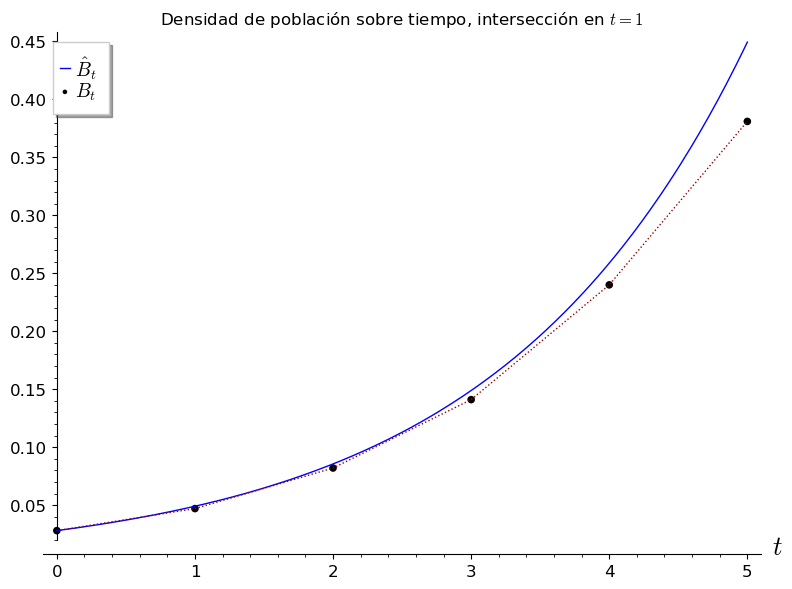

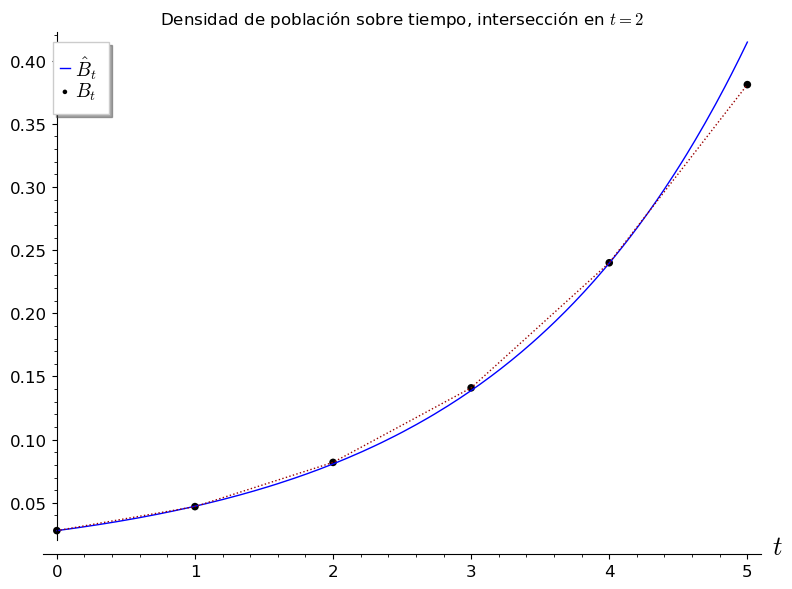

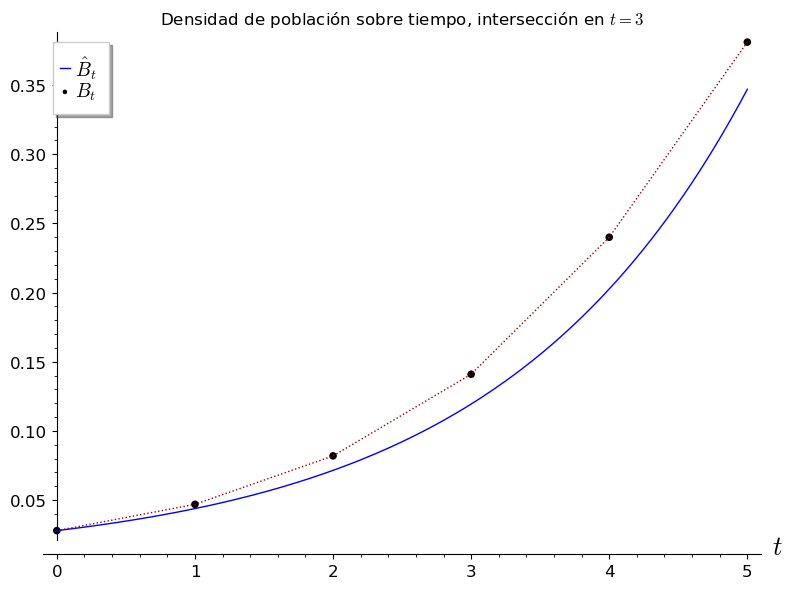

In [296]:
# Modelo de pendiente k que pasa por punto (a,b)
var('k,t,a,b') # específico de Sagemath junto con operaciones que impliquen estas variables
Recta = k*(t-a)+b
B = (1+k)^t *(0.028 +b/k-a)+a-b/k
punto_j = 0
for p in Tabla3:
    if punto_j == 0 or punto_j == len(Tabla3)-1:
        punto_j+=1
        continue
        
    if True:
        pass
    else:
        GraficaCambio = plot(Recta(t=x, a=p[0], b=p[1], k=k1), 
                  (x,0,max([Tabla3[i][0] for i in range(len(Tabla3))])), # maximo en los valores de x de la tabla
                      legend_label="$\\Delta \\hat B_t$")
        GraficaCambio.set_legend_options(font_size=14)
        show(GraficaCambio+dotted(tabla=Tabla3, label="$\\Delta B_t$"),
             title="Aumento de densidad sobre densidad, intersección en $t="+str(punto_j)+"$",
             figsize=8, fontsize=12, ticks=[0.05,None], axes_labels=['$B_t$',None])
    
    GraficaDensidad = plot(B(t=x, a=p[0], b=p[1], k=k1), (x, 0, 5), legend_label="$\\hat B_t$")
    GraficaDensidad.set_legend_options(font_size=14)
    show(GraficaDensidad+dotted(Tabla1, label="$B_t$"),
         title="Densidad de población sobre tiempo, intersección en $t="+str(punto_j)+"$",
         figsize=8, fontsize=12, axes_labels=['$t$',None])
    print("\n")
    
    punto_j+=1

Se observa fácilmente que con $t=2$ el modelo mejor se ajusta a los datos aún sin considerar el último punto en la pendiente promedio, ¿Qué pasa si se añade el último punto al promedio con un peso menor? Las siguientes graficas son de el modelo tomando en cuenta el último punto.

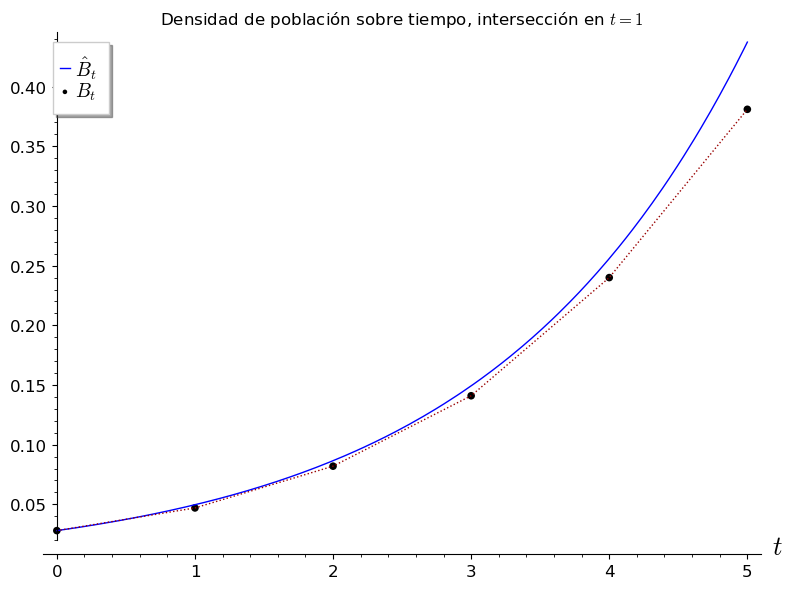

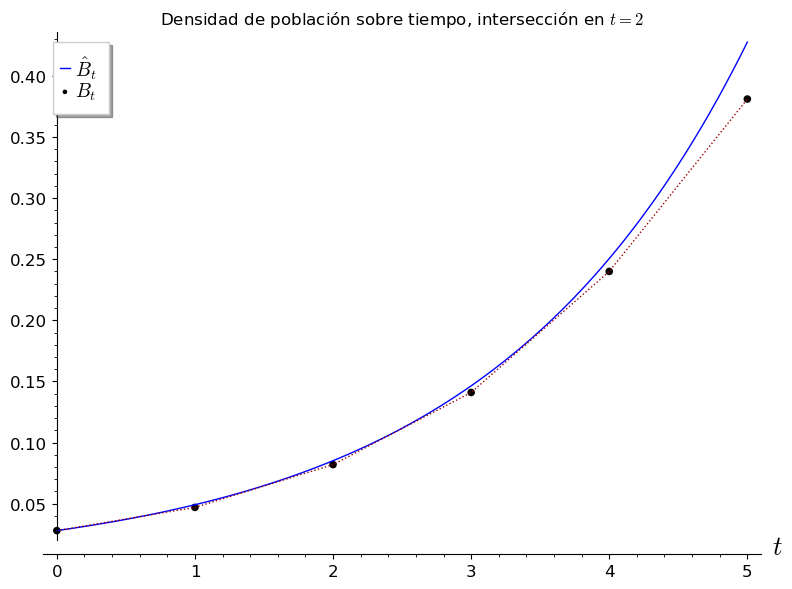

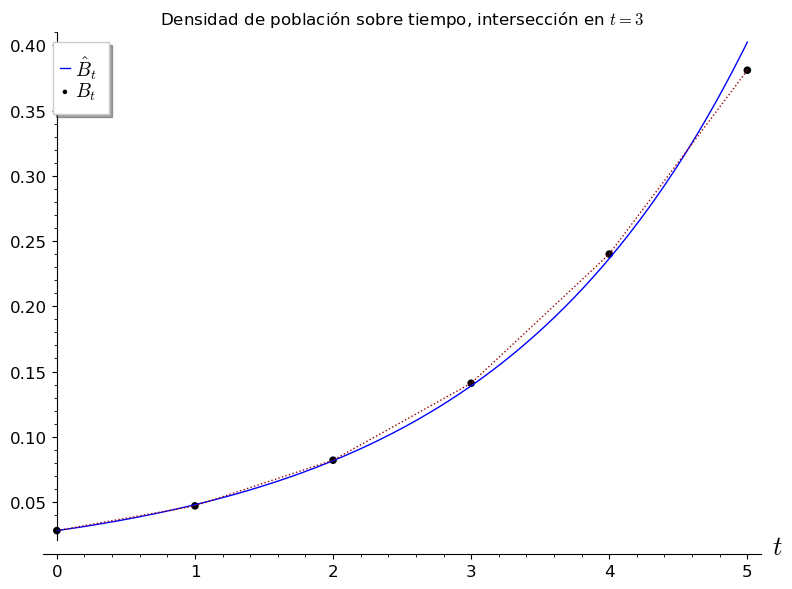

In [346]:
# Modelo de pendiente k que pasa por punto (a,b)
var('k,t,a,b') # específico de Sagemath junto con operaciones que impliquen estas variables
Recta = k*(t-a)+b
B = (1+k)^t *(0.028 +b/k-a)+a-b/k
punto_j = 0
for p in Tabla3:
    if punto_j == 0 or punto_j == len(Tabla3)-1:
        punto_j+=1
        continue
        
    if True:
        pass
    else:
        GraficaCambio = plot(Recta(t=x, a=p[0], b=p[1], k=k2), 
                  (x,0,max([Tabla3[i][0] for i in range(len(Tabla3))])), # maximo en los valores de x de la tabla
                      legend_label="$\\Delta \\hat B_t$")
        GraficaCambio.set_legend_options(font_size=14)
        show(GraficaCambio+dotted(tabla=Tabla3, label="$\\Delta B_t$"),
             title="Aumento de densidad sobre densidad, intersección en $t="+str(punto_j)+"$",
             figsize=8, fontsize=12, ticks=[0.05,None], axes_labels=['$B_t$',None])
    
    GraficaDensidad = plot(B(t=x, a=p[0], b=p[1], k=k2), (x, 0, 5), legend_label="$\\hat B_t$")
    GraficaDensidad.set_legend_options(font_size=14)
    show(GraficaDensidad+dotted(Tabla1, label="$B_t$"),
         title="Densidad de población sobre tiempo, intersección en $t="+str(punto_j)+"$",
         figsize=8, fontsize=12, axes_labels=['$t$',None])
    print("\n")
    
    punto_j+=1

Como se puede observar, con excepción de usar intersección en $t=3$ el modelo sobrestima el resultado real. Incluso en el último caso, cuando $t=1,2,3,4$ se tiene una sobreestimación pequeña mientras 

##### Descripción del Experimento

El biólogo propone que en un intervalo de tiempo constante (en este caso 16 minutos), una fracción de la población de bacterias se "divide"; como resultado de tal proceso llamado fisión binaria, una bacteria se convierte en dos bacterias. Tal supuesto será altamente preciso solo durante que las condiciones del experimento se mantengan lo suficientemente similares. Entre estas condiciones conocidas por el biólogo, que la densidad de población se mantenga bajo cierto nivel y que haya abundantes nutrientes. Con estos supuestos sobre el fénomeno, usamos la siguiente notación: